# Tâche 8

Dans cette dernière tâche, il nous est demandé d'abord de télécharger le matériau qui nous est attribué(à savoir le InP dans mon cas), pour ensuite déterminer sa bande interdite, la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion et de calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique. Commençons donc par télécharger le fichier. 

## Téléchargement du matériau

Pour télécharger le matériau qui m'a été attribué, je vais reprendre le même code que dans les tâches précédents, en modifiant une code de ligne pour obtenir la structure de bande, et en supprimant la ligne qui permet de récupérer un fichier cif. 

In [79]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np


with MPRester("m2OqTvaFpA9jexGPK") as m:
    structure = m.get_bandstructure_by_material_id("mp-966800")

## Bande interdite 

Déterminons maintenant la bande interdite du InP

{'direct': True, 'energy': 0.5137999999999998, 'transition': '\\Gamma-\\Gamma'}


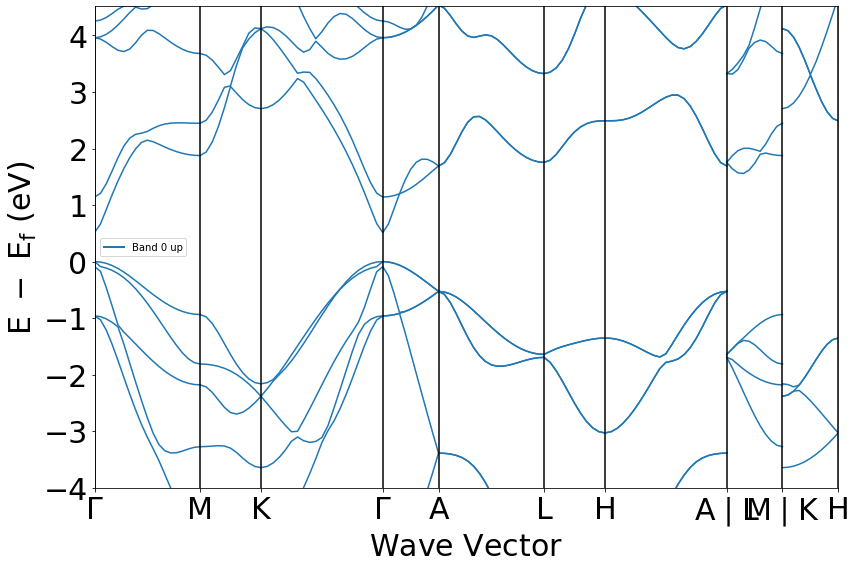

In [80]:
bsplot = BSPlotter(structure)
print(structure.get_band_gap())
bsplot.show()

La bande est directe. Cela se voit via le graphe, mais est également donné comme information dans la fonction get_band_gap(). Son énergie est de 0.51379. Le matériau est donc un semi-conducteur. Enfin, on voit sur le graphe, mais également dans le facteur "transition" imprimé ci-dessus, que la transition se fait de gamma à gamma. Cela confirme bien que la bande est direct, et la transition est donc plus probable que dans le cas où la bande est indirecte. 

## Dispersions dans la bande

L'objectif ici est de déterminer les directions dans lesquelles la dernière bande de valence et la première bande de conduction présentent le plus et le moins de dispersion. Ensuite, une figure indiquant la dispersion par des flèches sera représentée. 

### Détermination des directions

In [81]:
elem = bsplot.bs_plot_data()
E = elem.get('energy')
print(structure.get_vbm()['band_index'])
print(structure.get_cbm()['band_index'])
print("La dernière bande de valence se trouve en index 17 et la première ligne de conduction en indice 18.")
dist = elem.get('ticks').get('distance')
dist = np.array([dist[0], dist[1], dist[3], dist[5], dist[7], dist[9], dist[11], dist[13], dist[14], dist[15]])

defaultdict(<class 'list'>, {<Spin.up: 1>: [16, 17]})
defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})
La dernière bande de valence se trouve en index 17 et la première ligne de conduction en indice 18.


In [82]:
##Distance 
dx = np.zeros(9)
for i in range(9):
    dx[i] = dist[i+1] - dist[i]
##Pentes
V = np.zeros(9)
C = np.zeros(9)
for i in range(9):
    V[i] = (E.get('1')[i][17][-1]) - (E.get('1')[i][17][0])
    V[i] = V[i]/dx[i]
    C[i] = (E.get('1')[i][18][-1]) - (E.get('1')[i][18][0])
    C[i] = C[i]/dx[i]
    
vmax = np.max(abs(V))
vmin = np.min(abs(V))
cmax = np.max(abs(C))
cmin = np.min(abs(C))
print(V)
print(C)
print(vmax,vmin,cmax,cmin)

[-1.08662264 -2.46468395  2.17338466 -1.15805631 -1.29403501  0.58219614
  0.82956912  1.55066618  1.77915765]
[ 1.58014106  1.66939115 -2.20313778  2.58744624  0.07277424  1.48082072
 -0.80343463  0.26584104 -0.47192278]
2.4646839507489338 0.582196143667938 2.5874462392543527 0.07277423546243796


Les différentes directions qu'on souhaite déterminer sont : 
   * Dernière bande de valence la plus dispersée : K - M : 2.4646839507489338
   * Dernière bande de valence la moins dispersée : H - L : 0.582196143667938
   * Première bande de valence la plus dispersée : Gamma - A : 2.5874462392543527
   * Première bande de valence la plus dispersée : A - L : 0.07277423546243796
   
### Représentation 

Dans le graphe, la flèche jaune représente la direction où la bande de conduction est la plus dispersée, la flèche bleue la direction où la bande de valence est le moins dispersée, la flèche verte la direction avec la bande de conduction ayant le plus de dispersion et la flèche rouge la direction où la bande de conduction présente le moins de dispersion.

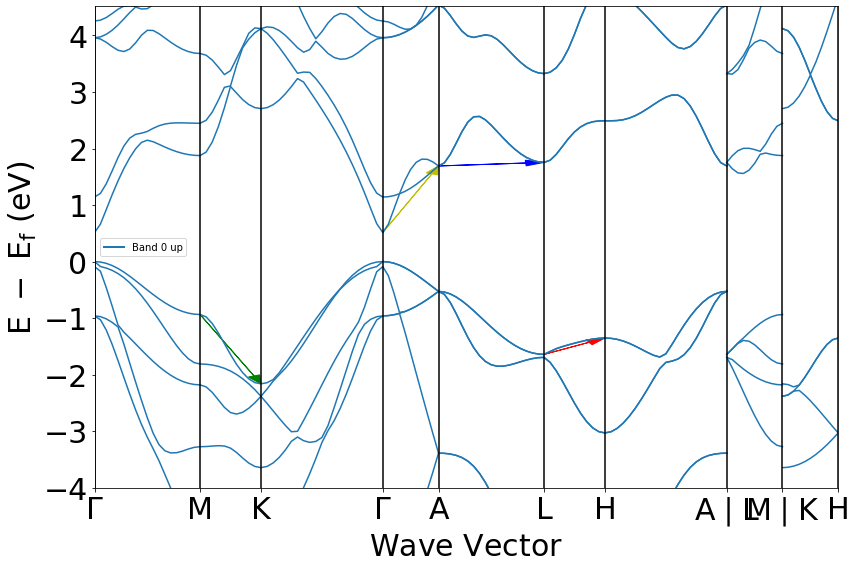

In [83]:
bsplot.get_plot()
plt.arrow(dist[1], E.get('1')[1][17][0], dist[2] - dist[1] ,  E.get('1')[1][17][-1] - E.get('1')[1][17][0], color = 'g',head_width = 0.1,length_includes_head=True)
plt.arrow(dist[5], E.get('1')[5][17][0], dist[6] - dist[5] ,  E.get('1')[5][17][-1] - E.get('1')[5][17][0], color = 'r',head_width = 0.1,length_includes_head=True)
plt.arrow(dist[3], E.get('1')[3][18][0], dist[4] - dist[3] ,  E.get('1')[3][18][-1] - E.get('1')[3][18][0], color = 'y',head_width = 0.1,length_includes_head=True)
plt.arrow(dist[4], E.get('1')[4][18][0], dist[5] - dist[4] ,  E.get('1')[4][18][-1] - E.get('1')[4][18][0], color = 'b',head_width = 0.1,length_includes_head=True)

plt.show()

## Masse effective

Le dernier objectif est de calculer les masses effectives au sommet de la dernière bande de valence et de la première bande de conduction. Pour cela, il est demander de poser comme hypothèse qu'on a des dispersion parabolique. Dans ce cas, la masse effective est isotrope et son tenseur se réduit à un scalaire. On peut alors trouver la masse effective via la formule : $$ m = h^2 (\frac{\partial^2(E)}{\partial(k^2)})^{-1} $$ 
Comme l'énergie suit une parabole, nous avons comme équation : $ E = ak^2+bk+c $. La dérivée seconde devient alors 2a. Le but est de trouver ce paramètre a pour ensuite calculer m.

In [84]:
##Constantes dont on aura besoin 
A = 10**-10 
eV = 1.602176563*10**(-19) 
hbar = 1.054571818*10**(-34)


a = elem.get('distance')
energie = E.get('1')

## Bande de valence
minpointV = elem['vbm']
oderpointV = ([dist[4],energie[4][17][0]])
val = (2*oderpointV[1])/((oderpointV[0]-minpointV[0][0])**2)
mV = abs((hbar**2)/(2*val*(A**2)*eV))
print (mV)

##Bande de conduction
maxpointC = elem['cbm']
oderpointC = ([dist[2],energie[2][18][0]])
val = (2*oderpointC[1])/((oderpointC[0]-maxpointC[0][0])**2)
mC = abs((hbar**2)/(2*val*(A**2)*eV))
print (mC)

2.597736267145421e-29
1.1845527688603204e-30


Les masses effectives sont : 
* Sommet de la dernière bande de valence : $2.597736267145421*10^{-29}$ kg
* Sommet de la première bande de conduction : $1.1845527688603204*10^{-30}$ kg